In [11]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

In [12]:
test_set = MNIST('./data', train=False, download=True)

In [13]:
test_set_array = test_set.data.numpy()[:2000]
test_set_array.shape

(2000, 28, 28)

In [14]:
print(test_set_array.max())
test_set_array = test_set_array / 255
print(test_set_array.max())

255
1.0


In [15]:
# flatten the images and create a matrix
test_set_array = test_set_array.reshape(2000, 784)
test_set_array.shape

(2000, 784)

### 1.) a.

In [16]:
# calculate the eigenvalues of the covariance matrix
# calculate the variance
cov = np.cov(test_set_array)
print(cov.shape)

eigenvalues, eigenvectors = np.linalg.eig(cov)

variances = eigenvalues / eigenvalues.sum()
variances[:5]

(2000, 2000)


array([0.31344293-2.40227066e-34j, 0.06126925-4.69576102e-35j,
       0.05487125-4.20540988e-35j, 0.04190044-3.21130830e-35j,
       0.03469382-2.65898325e-35j])

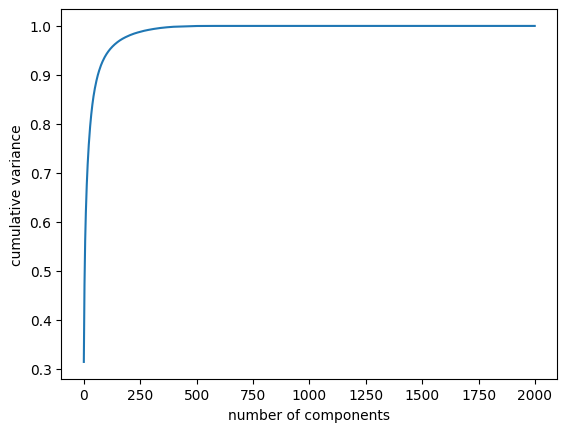

In [17]:
# plot the cumulative variance vs the number of components
cumulative_variance = np.cumsum(variances)
plt.plot(cumulative_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()

### 1.) b.

The error of p = 50 equals: 0.8639758597331566
The error of p = 250 equals: 4.179429919147084
The error of p = 500 equals: 17.992857804804032


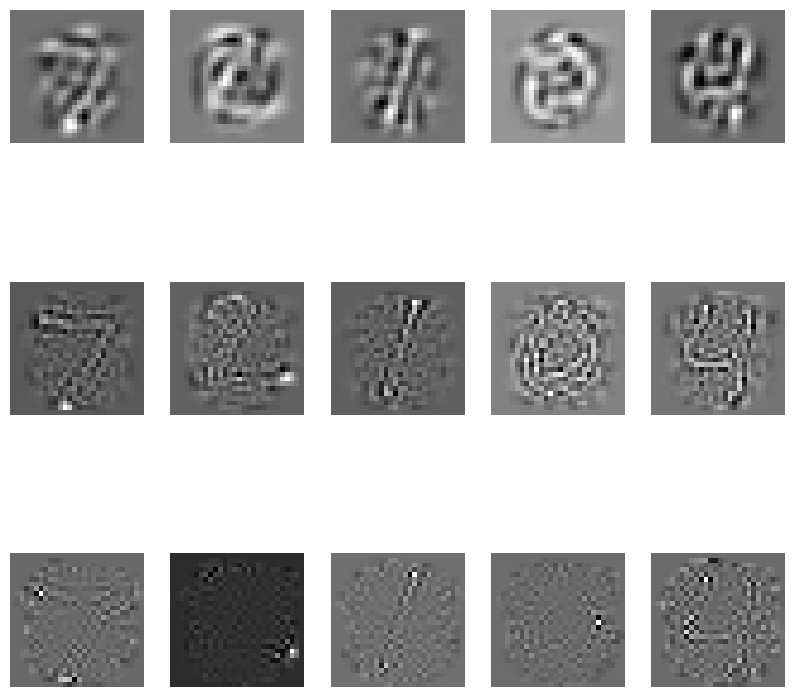

In [18]:
p =  [50, 250, 500]
off = 0
plt.figure(figsize=(10, 10))
for i in p:
    eigenvalues_p = eigenvalues[:i]
    eigenvectors_p = eigenvectors[:, :i]

    # calculate the projection matrix
    projection_matrix = eigenvectors_p @ np.diag(eigenvalues_p ** -0.5)

    # project the data
    projected_data = test_set_array.T @ projection_matrix

    # reconstruct the data
    reconstructed_data = projected_data @ projection_matrix.T

    # calculate the error
    error = np.linalg.norm(test_set_array - reconstructed_data.T) / np.linalg.norm(test_set_array)
    print(f"The error of p = {i} equals: {error}")

    # visualize the images
    for j in range(5):
        plt.subplot(3, 5, j + off + 1)
        plt.imshow(reconstructed_data.T[j].astype(np.float64).reshape(28, 28), cmap='gray')
        plt.axis('off')
    off += 5
plt.show()